In [51]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Bad dataset
import pandas as pd
#first empz lists to save our results
list_of_mismatches_scorer1 = []
list_of_mismatches_scorer2 = []
list_of_mismatches_scorer3 = []
list_of_mismatches_scorer4 = []
list_of_mismatches_scorer1_percent = []
list_of_mismatches_scorer2_percent = []
list_of_mismatches_scorer3_percent = []
list_of_mismatches_scorer4_percent = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
#print (df_Konsens)

# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer2= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer3= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer4= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
#print (df_scorer1['scorer'])

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer1_negative = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
    df_scorer2_negative = df_scorer2.loc[(df_scorer2['scorer'] < 0)].index
    df_scorer3_negative = df_scorer3.loc[(df_scorer3['scorer'] < 0)].index
    df_scorer4_negative = df_scorer4.loc[(df_scorer4['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer1_negative.union(df_scorer2_negative).union(df_scorer3_negative).union(df_scorer4_negative).union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_scorer2 = df_scorer2[~df_scorer2.index.isin(df_all_negative_values_to_drop)]
    df_scorer3 = df_scorer3[~df_scorer3.index.isin(df_all_negative_values_to_drop)]
    df_scorer4 = df_scorer4[~df_scorer4.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]

#here i count the mismatches with the consensus for each scorer
    print ('scorer1 mismatches = ',len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer2 mismatches = ',len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer3 mismatches = ',len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer4 mismatches = ',len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer5 mismatches = ',len(df_Konsens.loc[(df_Konsens['scorer'] != df_Konsens['scorer'])].index))
    print (i)
    
    list_of_length_of_night.append(len(df_Konsens['scorer'])) # length of night
    list_of_mismatches_scorer1.append(len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer1_percent.append(len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer2.append(len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer2_percent.append(len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer3.append(len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer3_percent.append(len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer4.append(len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer4_percent.append(len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches


# form a dictionar from lists of number of nights, length of nichts, mismatches and mismatches_percent
dict_for_new_df = {'number_of_night' : list_of_nights, 'length_of_night' : list_of_length_of_night, 'scorer1_mismatches' : list_of_mismatches_scorer1, 'mismatchpercent_scorer1' : list_of_mismatches_scorer1_percent,'scorer2_mismatches' : list_of_mismatches_scorer2, 'mismatch_percent_scorer2' : list_of_mismatches_scorer2_percent, 'scorer3_mismatches' : list_of_mismatches_scorer3, 'mismatche_percent_scorer_3' : list_of_mismatches_scorer3_percent, 'scorer4_mismatches' : list_of_mismatches_scorer4, 'miscmatch_percent_scorer4' : list_of_mismatches_scorer4_percent}
new_df = pd.DataFrame(dict_for_new_df) # form a datafram from dictonzra
print(new_df)
new_df.to_csv('mismatches_bad_database_leonora.txt', sep = '\t') # save dataframe as csv on txt

total_number_epochs = new_df['length_of_night'].sum()
total_mismatches_scorer1 = new_df['scorer1_mismatches'].sum()
total_mismatches_scorer2 = new_df['scorer2_mismatches'].sum()
total_mismatches_scorer3 = new_df['scorer3_mismatches'].sum()
total_mismatches_scorer4 = new_df['scorer4_mismatches'].sum()

print("Epochs:", total_number_epochs, "Total mismatches scorer1:", total_mismatches_scorer1, "Total mismatches scorer2:", total_mismatches_scorer2, "Total mismatches scorer3:", total_mismatches_scorer3, "Total mismatches scorer4:", total_mismatches_scorer4)

#percent_mismatches_scorer1 = (new_df[''] / df['column_name'].sum()) * 100
percent_mismatches_scorer1 = (total_mismatches_scorer1 * 100) / total_number_epochs
percent_mismatches_scorer2 = (total_mismatches_scorer2 * 100) / total_number_epochs
percent_mismatches_scorer3 = (total_mismatches_scorer3 * 100) / total_number_epochs
percent_mismatches_scorer4 = (total_mismatches_scorer4 * 100) / total_number_epochs

print("Percent of mismatches scorer1:", percent_mismatches_scorer1, "Percent of mismatches scorer2:",  percent_mismatches_scorer2, "Percent of mismatches scorer3:",  percent_mismatches_scorer3, "Percent of mismatches scorer4:",  percent_mismatches_scorer4)
print ("max value of each colomn:")
print (new_df.max(numeric_only=True))
print ("min value of each colomn:")
print (new_df.min(numeric_only=True))

scorer1 mismatches =  28
scorer2 mismatches =  68
scorer3 mismatches =  46
scorer4 mismatches =  176
scorer5 mismatches =  0
11
scorer1 mismatches =  122
scorer2 mismatches =  129
scorer3 mismatches =  181
scorer4 mismatches =  111
scorer5 mismatches =  0
19
scorer1 mismatches =  208
scorer2 mismatches =  186
scorer3 mismatches =  181
scorer4 mismatches =  150
scorer5 mismatches =  0
32
scorer1 mismatches =  63
scorer2 mismatches =  115
scorer3 mismatches =  76
scorer4 mismatches =  166
scorer5 mismatches =  0
38
scorer1 mismatches =  61
scorer2 mismatches =  71
scorer3 mismatches =  63
scorer4 mismatches =  97
scorer5 mismatches =  0
57
scorer1 mismatches =  80
scorer2 mismatches =  86
scorer3 mismatches =  137
scorer4 mismatches =  150
scorer5 mismatches =  0
59
scorer1 mismatches =  95
scorer2 mismatches =  202
scorer3 mismatches =  94
scorer4 mismatches =  128
scorer5 mismatches =  0
81
scorer1 mismatches =  84
scorer2 mismatches =  61
scorer3 mismatches =  100
scorer4 mismatches =

In [45]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Good dataset
import pandas as pd
#first empz lists to save our results
list_of_mismatches_scorer1 = []
list_of_mismatches_scorer2 = []
list_of_mismatches_scorer3 = []
list_of_mismatches_scorer4 = []
list_of_mismatches_scorer1_percent = []
list_of_mismatches_scorer2_percent = []
list_of_mismatches_scorer3_percent = []
list_of_mismatches_scorer4_percent = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED
#63 excl because no scorer3
list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer2= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer3= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer4= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer1_negative = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
    df_scorer2_negative = df_scorer2.loc[(df_scorer2['scorer'] < 0)].index
    df_scorer3_negative = df_scorer3.loc[(df_scorer3['scorer'] < 0)].index
    df_scorer4_negative = df_scorer4.loc[(df_scorer4['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer1_negative.union(df_scorer2_negative).union(df_scorer3_negative).union(df_scorer4_negative).union(df_Konsens_negative)
#print (df_all_negative_values_to_drop)


#print (len(df_scorer1['scorer']))
#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_scorer2 = df_scorer2[~df_scorer2.index.isin(df_all_negative_values_to_drop)]
    df_scorer3 = df_scorer3[~df_scorer3.index.isin(df_all_negative_values_to_drop)]
    df_scorer4 = df_scorer4[~df_scorer4.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]

#here i count the mismatches with the consensus for each scorer
    print ('scorer1 mismatches = ',len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer2 mismatches = ',len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer3 mismatches = ',len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer4 mismatches = ',len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer5 mismatches = ',len(df_Konsens.loc[(df_Konsens['scorer'] != df_Konsens['scorer'])].index))
    print (i)
    
    list_of_length_of_night.append(len(df_Konsens['scorer'])) # length of night
    list_of_mismatches_scorer1.append(len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer1_percent.append(len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer2.append(len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer2_percent.append(len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer3.append(len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer3_percent.append(len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer4.append(len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer4_percent.append(len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    
print('-----------------------------------')
print(list_of_nights)
print(list_of_mismatches_scorer1)
print(list_of_mismatches_scorer2)
print(list_of_mismatches_scorer3)
print(list_of_mismatches_scorer4)

# form a dictionar from lists of number of nights, length of nichts, mismatches and mismatches_percent
dict_for_new_df = {'number_of_night' : list_of_nights, 'length_of_night' : list_of_length_of_night, 'scorer1_mismatches' : list_of_mismatches_scorer1, 'mismatchpercent_scorer1' : list_of_mismatches_scorer1_percent,'scorer2_mismatches' : list_of_mismatches_scorer2, 'mismatch_percent_scorer2' : list_of_mismatches_scorer2_percent, 'scorer3_mismatches' : list_of_mismatches_scorer3, 'mismatche_percent_scorer_3' : list_of_mismatches_scorer3_percent, 'scorer4_mismatches' : list_of_mismatches_scorer4, 'miscmatch_percent_scorer4' : list_of_mismatches_scorer4_percent}
new_df = pd.DataFrame(dict_for_new_df) # form a datafram from dictonzra
print(new_df)
new_df.to_csv('mismatches_good_database_leonora.txt', sep = '\t') # save dataframe as csv on txt

total_number_epochs = new_df['length_of_night'].sum()
total_mismatches_scorer1 = new_df['scorer1_mismatches'].sum()
total_mismatches_scorer2 = new_df['scorer2_mismatches'].sum()
total_mismatches_scorer3 = new_df['scorer3_mismatches'].sum()
total_mismatches_scorer4 = new_df['scorer4_mismatches'].sum()

print("Epochs:", total_number_epochs, "Total mismatches scorer1:", total_mismatches_scorer1, "Total mismatches scorer2:", total_mismatches_scorer2, "Total mismatches scorer3:", total_mismatches_scorer3, "Total mismatches scorer4:", total_mismatches_scorer4)

#percent_mismatches_scorer1 = (new_df[''] / df['column_name'].sum()) * 100
percent_mismatches_scorer1 = (total_mismatches_scorer1 * 100) / total_number_epochs
percent_mismatches_scorer2 = (total_mismatches_scorer2 * 100) / total_number_epochs
percent_mismatches_scorer3 = (total_mismatches_scorer3 * 100) / total_number_epochs
percent_mismatches_scorer4 = (total_mismatches_scorer4 * 100) / total_number_epochs

print("Percent of mismatches scorer1:", percent_mismatches_scorer1, "Percent of mismatches scorer2:",  percent_mismatches_scorer2, "Percent of mismatches scorer3:",  percent_mismatches_scorer3, "Percent of mismatches scorer4:",  percent_mismatches_scorer4)
print ("max value of each colomn:")
print (new_df.max(numeric_only=True))
print ("min value of each colomn:")
print (new_df.min(numeric_only=True))

scorer1 mismatches =  72
scorer2 mismatches =  121
scorer3 mismatches =  99
scorer4 mismatches =  144
scorer5 mismatches =  0
12
scorer1 mismatches =  79
scorer2 mismatches =  115
scorer3 mismatches =  140
scorer4 mismatches =  116
scorer5 mismatches =  0
13
scorer1 mismatches =  76
scorer2 mismatches =  74
scorer3 mismatches =  111
scorer4 mismatches =  126
scorer5 mismatches =  0
15
scorer1 mismatches =  60
scorer2 mismatches =  63
scorer3 mismatches =  71
scorer4 mismatches =  151
scorer5 mismatches =  0
16
scorer1 mismatches =  139
scorer2 mismatches =  136
scorer3 mismatches =  103
scorer4 mismatches =  139
scorer5 mismatches =  0
18
scorer1 mismatches =  61
scorer2 mismatches =  79
scorer3 mismatches =  91
scorer4 mismatches =  118
scorer5 mismatches =  0
20
scorer1 mismatches =  79
scorer2 mismatches =  93
scorer3 mismatches =  149
scorer4 mismatches =  88
scorer5 mismatches =  0
21
scorer1 mismatches =  43
scorer2 mismatches =  31
scorer3 mismatches =  128
scorer4 mismatches = 

In [49]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#All data
import pandas as pd
#first empz lists to save our results
list_of_mismatches_scorer1 = []
list_of_mismatches_scorer2 = []
list_of_mismatches_scorer3 = []
list_of_mismatches_scorer4 = []
list_of_mismatches_scorer1_percent = []
list_of_mismatches_scorer2_percent = []
list_of_mismatches_scorer3_percent = []
list_of_mismatches_scorer4_percent = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [70, 73, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82, 11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87]
#63 excl bc no sc3 data
#scorer3_84 is deleted

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer2= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer3= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer4= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer1_negative = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
    df_scorer2_negative = df_scorer2.loc[(df_scorer2['scorer'] < 0)].index
    df_scorer3_negative = df_scorer3.loc[(df_scorer3['scorer'] < 0)].index
    df_scorer4_negative = df_scorer4.loc[(df_scorer4['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer1_negative.union(df_scorer2_negative).union(df_scorer3_negative).union(df_scorer4_negative).union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_scorer2 = df_scorer2[~df_scorer2.index.isin(df_all_negative_values_to_drop)]
    df_scorer3 = df_scorer3[~df_scorer3.index.isin(df_all_negative_values_to_drop)]
    df_scorer4 = df_scorer4[~df_scorer4.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]

#here i count the mismatches with the consensus for each scorer
    print ('scorer1 mismatches = ',len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer2 mismatches = ',len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer3 mismatches = ',len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer4 mismatches = ',len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index))
    print ('scorer5 mismatches = ',len(df_Konsens.loc[(df_Konsens['scorer'] != df_Konsens['scorer'])].index))
    print (i)
    
    list_of_length_of_night.append(len(df_Konsens['scorer'])) # length of night
    list_of_mismatches_scorer1.append(len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer1_percent.append(len(df_scorer1.loc[(df_scorer1['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer2.append(len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer2_percent.append(len(df_scorer2.loc[(df_scorer2['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer3.append(len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer3_percent.append(len(df_scorer3.loc[(df_scorer3['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    list_of_mismatches_scorer4.append(len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index)) # count number of mismatches
    list_of_mismatches_scorer4_percent.append(len(df_scorer4.loc[(df_scorer4['scorer'] != df_Konsens['scorer'])].index)/len(df_Konsens['scorer'])*100) #count percents of mismatches
    
print('-----------------------------------')
print(list_of_nights)
print(list_of_mismatches_scorer1)
print(list_of_mismatches_scorer2)
print(list_of_mismatches_scorer3)
print(list_of_mismatches_scorer4)

# form a dictionar from lists of number of nights, length of nichts, mismatches and mismatches_percent
dict_for_new_df = {'number_of_night' : list_of_nights, 'length_of_night' : list_of_length_of_night, 'scorer1_mismatches' : list_of_mismatches_scorer1, 'mismatchpercent_scorer1' : list_of_mismatches_scorer1_percent,'scorer2_mismatches' : list_of_mismatches_scorer2, 'mismatch_percent_scorer2' : list_of_mismatches_scorer2_percent, 'scorer3_mismatches' : list_of_mismatches_scorer3, 'mismatche_percent_scorer_3' : list_of_mismatches_scorer3_percent, 'scorer4_mismatches' : list_of_mismatches_scorer4, 'miscmatch_percent_scorer4' : list_of_mismatches_scorer4_percent}
new_df = pd.DataFrame(dict_for_new_df) # form a datafram from dictonzra
print(new_df)
new_df.to_csv('mismatches_all_database_leonora.txt', sep = '\t') # save dataframe as csv on txt

total_number_epochs = new_df['length_of_night'].sum()
total_mismatches_scorer1 = new_df['scorer1_mismatches'].sum()
total_mismatches_scorer2 = new_df['scorer2_mismatches'].sum()
total_mismatches_scorer3 = new_df['scorer3_mismatches'].sum()
total_mismatches_scorer4 = new_df['scorer4_mismatches'].sum()

print("Epochs:", total_number_epochs, "Total mismatches scorer1:", total_mismatches_scorer1, "Total mismatches scorer2:", total_mismatches_scorer2, "Total mismatches scorer3:", total_mismatches_scorer3, "Total mismatches scorer4:", total_mismatches_scorer4)

#percent_mismatches_scorer1 = (new_df[''] / df['column_name'].sum()) * 100
percent_mismatches_scorer1 = (total_mismatches_scorer1 * 100) / total_number_epochs
percent_mismatches_scorer2 = (total_mismatches_scorer2 * 100) / total_number_epochs
percent_mismatches_scorer3 = (total_mismatches_scorer3 * 100) / total_number_epochs
percent_mismatches_scorer4 = (total_mismatches_scorer4 * 100) / total_number_epochs

print("Percent of mismatches scorer1:", percent_mismatches_scorer1, "Percent of mismatches scorer2:",  percent_mismatches_scorer2, "Percent of mismatches scorer3:",  percent_mismatches_scorer3, "Percent of mismatches scorer4:",  percent_mismatches_scorer4)
print ("max value of each colomn:")
print (new_df.max(numeric_only=True))
print("sd scorer1")
print(new_df['scorer1_mismatches'].std())
print ("min value of each colomn:")
print (new_df.min(numeric_only=True))

scorer1 mismatches =  57
scorer2 mismatches =  82
scorer3 mismatches =  125
scorer4 mismatches =  427
scorer5 mismatches =  0
70
scorer1 mismatches =  79
scorer2 mismatches =  66
scorer3 mismatches =  136
scorer4 mismatches =  124
scorer5 mismatches =  0
73
scorer1 mismatches =  72
scorer2 mismatches =  121
scorer3 mismatches =  99
scorer4 mismatches =  144
scorer5 mismatches =  0
12
scorer1 mismatches =  79
scorer2 mismatches =  115
scorer3 mismatches =  140
scorer4 mismatches =  116
scorer5 mismatches =  0
13
scorer1 mismatches =  76
scorer2 mismatches =  74
scorer3 mismatches =  111
scorer4 mismatches =  126
scorer5 mismatches =  0
15
scorer1 mismatches =  60
scorer2 mismatches =  63
scorer3 mismatches =  71
scorer4 mismatches =  151
scorer5 mismatches =  0
16
scorer1 mismatches =  139
scorer2 mismatches =  136
scorer3 mismatches =  103
scorer4 mismatches =  139
scorer5 mismatches =  0
18
scorer1 mismatches =  61
scorer2 mismatches =  79
scorer3 mismatches =  91
scorer4 mismatches =

 2    57.685895
 5    19.723241
 3    11.895632
-1     5.618540
 0     3.059353
 1     2.017339
Name: scorer1, dtype: float64
 2    60.998999
 5    18.162108
-1     6.587725
 3     6.462642
 0     4.186124
 1     3.602402
Name: scorer2, dtype: float64
 2    54.736284
 5    19.695362
 3    12.344650
-1     7.047590
 0     4.008791
 1     2.167323
Name: scorer3, dtype: float64
 2    55.228857
 5    19.392240
 3    12.102152
-1     7.373446
 0     3.826917
 1     2.076387
Name: scorer4, dtype: float64
 2    53.631511
 5    18.149466
 3    10.886445
-1     9.268845
 1     4.116791
 0     3.946943
Name: scorer5, dtype: float64
      scorer1    scorer2    scorer3    scorer4    scorer5
-1   5.618540   6.587725   7.047590   7.373446   9.268845
 0   3.059353   4.186124   4.008791   3.826917   3.946943
 1   2.017339   3.602402   2.167323   2.076387   4.116791
 2  57.685895  60.998999  54.736284  55.228857  53.631511
 3  11.895632   6.462642  12.344650  12.102152  10.886445
 5  19.723241  18.1621

<AxesSubplot:>

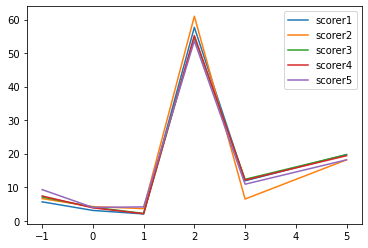

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#stage analysis for bad data

list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 84, 85, 86, 87, 70, 73]
#no 23 
df_scorer5 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer1 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer2 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer3 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer4 = pd.DataFrame(columns=['scorer', 'else'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
    df_scorer5 = df_scorer5.append(df_Konsens, ignore_index=True)
    
    df1 = pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer1 = df_scorer1.append(df1, ignore_index=True)
    
    df2 = pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer2 = df_scorer2.append(df2, ignore_index=True)
    
    df3 = pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer3 = df_scorer1.append(df3, ignore_index=True)
    
    df4 = pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
    df_scorer4 = df_scorer1.append(df4, ignore_index=True)

df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer1'})
df_scorer2 = df_scorer2.rename(columns={'scorer': 'scorer2'})
df_scorer3 = df_scorer3.rename(columns={'scorer': 'scorer3'})
df_scorer4 = df_scorer4.rename(columns={'scorer': 'scorer4'})
df_scorer5 = df_scorer5.rename(columns={'scorer': 'scorer5'})




df_scorer1_percent = df_scorer1['scorer1'].value_counts(normalize=True) * 100

df_scorer2_percent = df_scorer2['scorer2'].value_counts(normalize=True) * 100

df_scorer3_percent = df_scorer3['scorer3'].value_counts(normalize=True) * 100

df_scorer4_percent = df_scorer4['scorer4'].value_counts(normalize=True) * 100

df_scorer5_percent = df_scorer5['scorer5'].value_counts(normalize=True) * 100


All_percent_df = pd.concat([df_scorer1_percent, df_scorer2_percent, df_scorer3_percent, df_scorer4_percent, df_scorer5_percent], axis=1,)
print (All_percent_df)
All_percent_df.plot()



      scorer else
0          0    0
1          0    0
2          0    0
3          0    0
4          0    0
...      ...  ...
12359     -1    0
12360     -1    0
12361     -1    0
12362     -1    0
12363     -1    0

[12364 rows x 2 columns]
0    92.308314
1     7.691686
Name: else, dtype: float64
      scorer else
47         2    1
104        2    1
105        2    1
114        1    1
169        2    1
...      ...  ...
11809      1    1
11819      1    1
11935      2    1
11938      2    1
11964      1    1

[951 rows x 2 columns]
-1    39.116719
 2    27.865405
 1    15.667718
 5    14.090431
 3     2.208202
 0     1.051525
Name: scorer, dtype: float64


<AxesSubplot:>

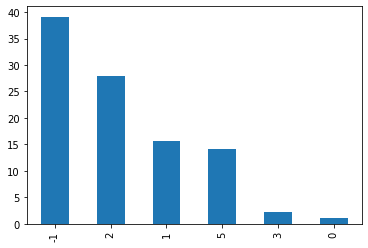

In [32]:
#stage analysis for bad data continue aro
df_scorer5 = pd.DataFrame(columns=['scorer', 'else'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
    df_scorer5 = df_scorer5.append(df_Konsens, ignore_index=True)

print (df_scorer5)
df_scorer5_aro_percent = df_scorer5['else'].value_counts(normalize=True) * 100
print (df_scorer5_aro_percent)

df_scorer5_no_aro_index = df_scorer5.loc[(df_scorer5['else'] == 0)].index
df_scorer5_aro = df_scorer5[~df_scorer5.index.isin(df_scorer5_no_aro_index)]
print (df_scorer5_aro)
df_scorer5_aro_stage_percent = df_scorer5_aro['scorer'].value_counts(normalize=True) * 100
print (df_scorer5_aro_stage_percent)
df_scorer5_aro_stage_percent.plot.bar()

 2    59.308279
 5    21.255447
 3    14.670479
 0     2.636166
 1     1.930828
-1     0.198802
Name: scorer1, dtype: float64
 2    64.872004
 5    20.585512
 3     8.090959
 1     3.417756
 0     2.796841
-1     0.234205
 4     0.002723
Name: scorer2, dtype: float64
 2    59.494041
 5    21.134816
 3    14.513726
 0     2.700043
 1     1.963184
-1     0.194190
Name: scorer3, dtype: float64
 2    59.400936
 5    21.129496
 3    14.620132
 0     2.723984
 1     1.931262
-1     0.194190
Name: scorer4, dtype: float64
 2    55.413943
 5    21.958061
 3    15.166122
 1     3.856209
 0     3.491285
-1     0.114379
Name: scorer5, dtype: float64
      scorer1    scorer2    scorer3    scorer4    scorer5
-1   0.198802   0.234205   0.194190   0.194190   0.114379
 0   2.636166   2.796841   2.700043   2.723984   3.491285
 1   1.930828   3.417756   1.963184   1.931262   3.856209
 2  59.308279  64.872004  59.494041  59.400936  55.413943
 3  14.670479   8.090959  14.513726  14.620132  15.166122
 4    

<AxesSubplot:>

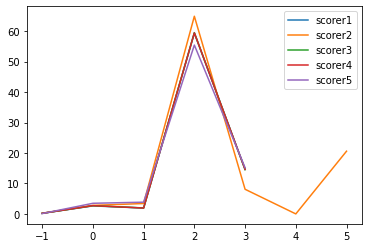

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#stage analysis for good data

list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]
#no 23
df_scorer5 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer1 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer2 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer3 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer4 = pd.DataFrame(columns=['scorer', 'else'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
    df_scorer5 = df_scorer5.append(df_Konsens, ignore_index=True)
    
    df1 = pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer1 = df_scorer1.append(df1, ignore_index=True)
    
    df2 = pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer2 = df_scorer2.append(df2, ignore_index=True)
    
    df3 = pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer3 = df_scorer1.append(df3, ignore_index=True)
    
    df4 = pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
    df_scorer4 = df_scorer1.append(df4, ignore_index=True)

df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer1'})
df_scorer2 = df_scorer2.rename(columns={'scorer': 'scorer2'})
df_scorer3 = df_scorer3.rename(columns={'scorer': 'scorer3'})
df_scorer4 = df_scorer4.rename(columns={'scorer': 'scorer4'})
df_scorer5 = df_scorer5.rename(columns={'scorer': 'scorer5'})




df_scorer1_percent = df_scorer1['scorer1'].value_counts(normalize=True) * 100
print (df_scorer1_percent)
df_scorer2_percent = df_scorer2['scorer2'].value_counts(normalize=True) * 100
print (df_scorer2_percent)
df_scorer3_percent = df_scorer3['scorer3'].value_counts(normalize=True) * 100
print (df_scorer3_percent)
df_scorer4_percent = df_scorer4['scorer4'].value_counts(normalize=True) * 100
print (df_scorer4_percent)
df_scorer5_percent = df_scorer5['scorer5'].value_counts(normalize=True) * 100
print (df_scorer5_percent)

All_percent_df = pd.concat([df_scorer1_percent, df_scorer2_percent, df_scorer3_percent, df_scorer4_percent, df_scorer5_percent], axis=1,)
print (All_percent_df)
All_percent_df.plot()



      scorer else
0          0    0
1          0    0
2          0    0
3          0    0
4          0    0
...      ...  ...
36715      0    0
36716      0    0
36717      0    0
36718      0    0
36719      0    0

[36720 rows x 2 columns]
0    94.95098
1     5.04902
Name: else, dtype: float64
      scorer else
69         3    1
97         3    1
101        2    1
135        2    1
182        5    1
...      ...  ...
36615      1    1
36619      2    1
36626      1    1
36630      2    1
36639      2    1

[1854 rows x 2 columns]
2    41.963323
5    27.723840
1    21.521036
3     6.850054
0     1.941748
Name: scorer, dtype: float64


<AxesSubplot:>

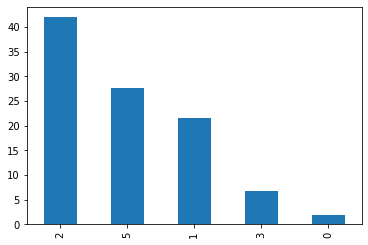

In [34]:
#stage analysis for good data continue aro
df_scorer5 = pd.DataFrame(columns=['scorer', 'else'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
    df_scorer5 = df_scorer5.append(df_Konsens, ignore_index=True)

print (df_scorer5)
df_scorer5_aro_percent = df_scorer5['else'].value_counts(normalize=True) * 100
print (df_scorer5_aro_percent)

df_scorer5_no_aro_index = df_scorer5.loc[(df_scorer5['else'] == 0)].index
df_scorer5_aro = df_scorer5[~df_scorer5.index.isin(df_scorer5_no_aro_index)]
print (df_scorer5_aro)
df_scorer5_aro_stage_percent = df_scorer5_aro['scorer'].value_counts(normalize=True) * 100
print (df_scorer5_aro_stage_percent)
df_scorer5_aro_stage_percent.plot.bar()

 2    58.908777
 5    20.878151
 3    13.987191
 0     2.740373
 1     1.952131
-1     1.533377
Name: scorer1, dtype: float64
 2    63.918542
 5    19.988914
 3     7.690097
 1     3.463212
 0     3.138857
-1     1.798325
 4     0.002053
Name: scorer2, dtype: float64
 2    58.752698
 5    21.004861
 3    13.991811
 0     2.773352
 1     1.970592
-1     1.506686
Name: scorer3, dtype: float64
 2    58.744630
 5    20.932250
 3    14.050304
 0     2.809657
 1     1.956474
-1     1.506686
Name: scorer4, dtype: float64
 2    54.964958
 5    20.998696
 3    14.088094
 1     3.921848
 0     3.606063
-1     2.420341
Name: scorer5, dtype: float64
      scorer1    scorer2    scorer3    scorer4    scorer5
-1   1.533377   1.798325   1.506686   1.506686   2.420341
 0   2.740373   3.138857   2.773352   2.809657   3.606063
 1   1.952131   3.463212   1.970592   1.956474   3.921848
 2  58.908777  63.918542  58.752698  58.744630  54.964958
 3  13.987191   7.690097  13.991811  14.050304  14.088094
 4    

<AxesSubplot:>

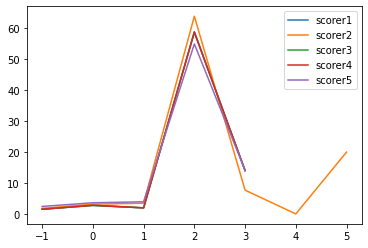

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#stage analysis for all data

list_of_nights = [70, 73, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82, 11, 19, 32, 38, 57, 59,  81, 83, 84, 85, 86, 87]

#no 23 
df_scorer5 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer1 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer2 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer3 = pd.DataFrame(columns=['scorer', 'else'])
df_scorer4 = pd.DataFrame(columns=['scorer', 'else'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
    df_scorer5 = df_scorer5.append(df_Konsens, ignore_index=True)
    
    df1 = pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer1 = df_scorer1.append(df1, ignore_index=True)
    
    df2 = pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer2 = df_scorer2.append(df2, ignore_index=True)
    
    df3 = pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer3 = df_scorer1.append(df3, ignore_index=True)
    
    df4 = pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
    df_scorer4 = df_scorer1.append(df4, ignore_index=True)

df_scorer1 = df_scorer1.rename(columns={'scorer': 'scorer1'})
df_scorer2 = df_scorer2.rename(columns={'scorer': 'scorer2'})
df_scorer3 = df_scorer3.rename(columns={'scorer': 'scorer3'})
df_scorer4 = df_scorer4.rename(columns={'scorer': 'scorer4'})
df_scorer5 = df_scorer5.rename(columns={'scorer': 'scorer5'})




df_scorer1_percent = df_scorer1['scorer1'].value_counts(normalize=True) * 100

df_scorer2_percent = df_scorer2['scorer2'].value_counts(normalize=True) * 100

df_scorer3_percent = df_scorer3['scorer3'].value_counts(normalize=True) * 100

df_scorer4_percent = df_scorer4['scorer4'].value_counts(normalize=True) * 100

df_scorer5_percent = df_scorer5['scorer5'].value_counts(normalize=True) * 100


All_percent_df = pd.concat([df_scorer1_percent, df_scorer2_percent, df_scorer3_percent, df_scorer4_percent, df_scorer5_percent], axis=1,)
print (All_percent_df)
All_percent_df.plot()



      scorer else
0          0    0
1          0    0
2          0    0
3          0    0
4          0    0
...      ...  ...
49079      2    0
49080      2    0
49081      2    0
49082      2    0
49083      0    0

[49084 rows x 2 columns]
0    94.285307
1     5.714693
Name: else, dtype: float64
      scorer else
38         2    1
59         2    1
143        2    1
151        1    1
154        2    1
...      ...  ...
48967      2    1
48989      5    1
48995      5    1
49056      1    1
49062      2    1

[2805 rows x 2 columns]
 2    37.183601
 5    23.101604
 1    19.536542
-1    13.262032
 3     5.276292
 0     1.639929
Name: scorer, dtype: float64


<AxesSubplot:>

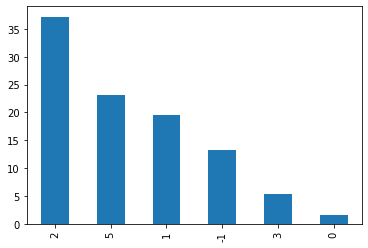

In [36]:
#stage analysis for good data continue aro
df_scorer5 = pd.DataFrame(columns=['scorer', 'else'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
    df_scorer5 = df_scorer5.append(df_Konsens, ignore_index=True)

print (df_scorer5)
df_scorer5_aro_percent = df_scorer5['else'].value_counts(normalize=True) * 100
print (df_scorer5_aro_percent)

df_scorer5_no_aro_index = df_scorer5.loc[(df_scorer5['else'] == 0)].index
df_scorer5_aro = df_scorer5[~df_scorer5.index.isin(df_scorer5_no_aro_index)]
print (df_scorer5_aro)
df_scorer5_aro_stage_percent = df_scorer5_aro['scorer'].value_counts(normalize=True) * 100
print (df_scorer5_aro_stage_percent)
df_scorer5_aro_stage_percent.plot.bar()

'\nCreated on Sun Jan  2 03:51:45 2022\n\n@author: user\n'

In [49]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Good dataset with fleiss kappa
import pandas as pd
#first empz lists to save our results
list_of_mismatches_scorer1 = []
list_of_mismatches_scorer2 = []
list_of_mismatches_scorer3 = []
list_of_mismatches_scorer4 = []
list_of_mismatches_scorer1_percent = []
list_of_mismatches_scorer2_percent = []
list_of_mismatches_scorer3_percent = []
list_of_mismatches_scorer4_percent = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

DFscorer1 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer2 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer3 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer4 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer5 = pd.DataFrame(columns=['scorer', 'else'])

list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer2= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer3= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer4= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer1_negative = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
    df_scorer2_negative = df_scorer2.loc[(df_scorer2['scorer'] < 0)].index
    df_scorer3_negative = df_scorer3.loc[(df_scorer3['scorer'] < 0)].index
    df_scorer4_negative = df_scorer4.loc[(df_scorer4['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer1_negative.union(df_scorer2_negative).union(df_scorer3_negative).union(df_scorer4_negative).union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_scorer2 = df_scorer2[~df_scorer2.index.isin(df_all_negative_values_to_drop)]
    df_scorer3 = df_scorer3[~df_scorer3.index.isin(df_all_negative_values_to_drop)]
    df_scorer4 = df_scorer4[~df_scorer4.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
# make 5 huge dataframes    
    DFscorer1 = DFscorer1.append(df_scorer1, ignore_index=True)
    DFscorer2 = DFscorer2.append(df_scorer2, ignore_index=True)
    DFscorer3 = DFscorer3.append(df_scorer3, ignore_index=True)
    DFscorer4 = DFscorer4.append(df_scorer4, ignore_index=True)
    DFscorer5 = DFscorer5.append(df_Konsens, ignore_index=True)

#rename the colomns i need
DFscorer1 = DFscorer1.rename(columns={'scorer': 'scorer1'})
DFscorer2 = DFscorer2.rename(columns={'scorer': 'scorer2'})
DFscorer3 = DFscorer3.rename(columns={'scorer': 'scorer3'})
DFscorer4 = DFscorer4.rename(columns={'scorer': 'scorer4'})
DFscorer5 = DFscorer5.rename(columns={'scorer': 'scorer5'})
DFscorer1 = DFscorer1.drop(columns='else')
DFscorer2 = DFscorer2.drop(columns='else')
DFscorer3 = DFscorer3.drop(columns='else')
DFscorer4 = DFscorer4.drop(columns='else')
DFscorer5 = DFscorer5.drop(columns='else')

AllNightsDF = pd.concat([DFscorer1, DFscorer2], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer3], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer4], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer5], axis=1,)
print (DFscorer1)
print (DFscorer2)
print (DFscorer3)
print (DFscorer4)
print (DFscorer5)
#AllNightsDF["id"] = AllNightsDF.index + 1
print (AllNightsDF)

# now we are making rate table
AllNightsDF = AllNightsDF.dropna()
AllNightsDF = AllNightsDF[AllNightsDF.scorer3 != 8]
AllNightsDF = AllNightsDF[AllNightsDF.scorer2 != 4]
dff = AllNightsDF.copy()
dff['zero']=(AllNightsDF == 0).T.sum()
dff['one']=(AllNightsDF == 1).T.sum()
dff['two']=(AllNightsDF == 2).T.sum()
dff['three']=(AllNightsDF == 3).T.sum()
dff['five']=(AllNightsDF == 5).T.sum()
print (dff)
dff = dff.drop(columns='scorer1')
dff = dff.drop(columns='scorer2')
dff = dff.drop(columns='scorer3')
dff = dff.drop(columns='scorer4')
dff = dff.drop(columns='scorer5')
print (dff)

Row_list =[]
  
# Iterate over each row
for index, rows in dff.iterrows():
    # Create list for the current row
    my_list =[rows.zero, rows.one, rows.two, rows.three, rows.five]
      
    # append the list to the final list
    Row_list.append(my_list)

def checkInput(rate, n):
    """ 
    Check correctness of the input matrix
    @param rate - ratings matrix
    @return n - number of raters
    @throws AssertionError 
    """
    N = len(rate)
    k = len(rate[0])
    assert all(len(rate[i]) == k for i in range(k)), "Row length != #categories)"
    
    #assert all(isinstance(rate[i][j], int) for i in range(N) for j in range(k)), "Element not integer" 
    assert all(sum(row) == n for row in rate), "Sum of ratings != #raters)"

def fleissKappa(rate,n):
    """ 
    Computes the Kappa value
    @param rate - ratings matrix containing number of ratings for each subject per category 
    [size - N X k where N = #subjects and k = #categories]
    @param n - number of raters   
    @return fleiss' kappa
    """

    N = len(rate)
    k = len(rate[0])
    print("#raters = ", n, ", #subjects = ", N, ", #categories = ", k)
    checkInput(rate, n)

    #mean of the extent to which raters agree for the ith subject 
    PA = sum([(sum([i**2 for i in row])- n) / (n * (n - 1)) for row in rate])/N
    print("PA = ", PA)
    
    # mean of squares of proportion of all assignments which were to jth category
    PE = sum([j**2 for j in [sum([rows[i] for rows in rate])/(N*n) for i in range(k)]])
    print("PE =", PE)
    
    kappa = -float("inf")
    try:
        kappa = (PA - PE) / (1 - PE)
        kappa = float("{:.3f}".format(kappa))
    except ZeroDivisionError:
        print("Expected agreement = 1")

    print("Fleiss' Kappa =", kappa)
    
    return kappa

print (type(Row_list[0][0]))
number_of_raters = np.int64(5)
kappa = fleissKappa(Row_list, number_of_raters)
print (kappa)


      scorer1
0           0
1           0
2           0
3           0
4           0
...       ...
36599       0
36600       0
36601       0
36602       0
36603       0

[36604 rows x 1 columns]
      scorer2
0           0
1           0
2           0
3           0
4           0
...       ...
36599       0
36600       0
36601       0
36602       0
36603       0

[36604 rows x 1 columns]
      scorer3
0           0
1           0
2           0
3           0
4           0
...       ...
36599       0
36600       0
36601       0
36602       0
36603       0

[36604 rows x 1 columns]
      scorer4
0           0
1           0
2           0
3           0
4           0
...       ...
36599       0
36600       0
36601       0
36602       0
36603       0

[36604 rows x 1 columns]
      scorer5
0           0
1           0
2           0
3           0
4           0
...       ...
36599       0
36600       0
36601       0
36602       0
36603       0

[36604 rows x 1 columns]
      scorer1 scorer2 scorer3 

In [48]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Good dataset with fleiss kappa CORRECT
import pandas as pd
import numpy as np
#first empz lists to save our results
list_of_mismatches_scorer1 = []
list_of_mismatches_scorer2 = []
list_of_mismatches_scorer3 = []
list_of_mismatches_scorer4 = []
list_of_mismatches_scorer1_percent = []
list_of_mismatches_scorer2_percent = []
list_of_mismatches_scorer3_percent = []
list_of_mismatches_scorer4_percent = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

DFscorer1 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer2 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer3 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer4 = pd.DataFrame(columns=['scorer', 'else'])


list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]
for i in list_of_nights:
    i = str(i)


# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer2= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer3= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer4= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
    
#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer1_negative = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
    df_scorer2_negative = df_scorer2.loc[(df_scorer2['scorer'] < 0)].index
    df_scorer3_negative = df_scorer3.loc[(df_scorer3['scorer'] < 0)].index
    df_scorer4_negative = df_scorer4.loc[(df_scorer4['scorer'] < 0)].index

# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer1_negative.union(df_scorer2_negative).union(df_scorer3_negative).union(df_scorer4_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_scorer2 = df_scorer2[~df_scorer2.index.isin(df_all_negative_values_to_drop)]
    df_scorer3 = df_scorer3[~df_scorer3.index.isin(df_all_negative_values_to_drop)]
    df_scorer4 = df_scorer4[~df_scorer4.index.isin(df_all_negative_values_to_drop)]

# make 5 huge dataframes    
    DFscorer1 = DFscorer1.append(df_scorer1, ignore_index=True)
    DFscorer2 = DFscorer2.append(df_scorer2, ignore_index=True)
    DFscorer3 = DFscorer3.append(df_scorer3, ignore_index=True)
    DFscorer4 = DFscorer4.append(df_scorer4, ignore_index=True)


#rename the colomns i need
DFscorer1 = DFscorer1.rename(columns={'scorer': 'scorer1'})
DFscorer2 = DFscorer2.rename(columns={'scorer': 'scorer2'})
DFscorer3 = DFscorer3.rename(columns={'scorer': 'scorer3'})
DFscorer4 = DFscorer4.rename(columns={'scorer': 'scorer4'})

DFscorer1 = DFscorer1.drop(columns='else')
DFscorer2 = DFscorer2.drop(columns='else')
DFscorer3 = DFscorer3.drop(columns='else')
DFscorer4 = DFscorer4.drop(columns='else')


AllNightsDF = pd.concat([DFscorer1, DFscorer2], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer3], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer4], axis=1,)



print (DFscorer1)
print (DFscorer2)
print (DFscorer3)
print (DFscorer4)

#AllNightsDF["id"] = AllNightsDF.index + 1
print (AllNightsDF)

AllNightsDF = AllNightsDF.dropna()
AllNightsDF = AllNightsDF[AllNightsDF.scorer3 != 8]
AllNightsDF = AllNightsDF[AllNightsDF.scorer2 != 4]
# now we are making rate table
dff = AllNightsDF.copy()
dff['zero']=(AllNightsDF == 0).T.sum()
dff['one']=(AllNightsDF == 1).T.sum()
dff['two']=(AllNightsDF == 2).T.sum()
dff['three']=(AllNightsDF == 3).T.sum()
dff['five']=(AllNightsDF == 5).T.sum()
dff = dff.drop(columns='scorer1')
dff = dff.drop(columns='scorer2')
dff = dff.drop(columns='scorer3')
dff = dff.drop(columns='scorer4')
print (dff)


Row_list =[]
  
# Iterate over each row
for index, rows in dff.iterrows():
    # Create list for the current row
    my_list =[rows.zero, rows.one, rows.two, rows.three, rows.five]
      
    # append the list to the final list
    Row_list.append(my_list)
    
def checkInput(rate, n):
    """ 
    Check correctness of the input matrix
    @param rate - ratings matrix
    @return n - number of raters
    @throws AssertionError 
    """
    N = len(rate)
    k = len(rate[0])
    assert all(len(rate[i]) == k for i in range(k)), "Row length != #categories)"
    #assert all(isinstance(rate[i][j], int) for i in range(N) for j in range(k)), "Element not integer" 
    assert all(sum(row) == n for row in rate), "Sum of ratings != #raters)"

def fleissKappa(rate,n):
    """ 
    Computes the Kappa value
    @param rate - ratings matrix containing number of ratings for each subject per category 
    [size - N X k where N = #subjects and k = #categories]
    @param n - number of raters   
    @return fleiss' kappa
    """

    N = len(rate)
    k = len(rate[0])
    print("#raters = ", n, ", #subjects = ", N, ", #categories = ", k)
    checkInput(rate, n)

    #mean of the extent to which raters agree for the ith subject 
    PA = sum([(sum([i**2 for i in row])- n) / (n * (n - 1)) for row in rate])/N
    print("PA = ", PA)
    
    # mean of squares of proportion of all assignments which were to jth category
    PE = sum([j**2 for j in [sum([rows[i] for rows in rate])/(N*n) for i in range(k)]])
    print("PE =", PE)
    
    kappa = -float("inf")
    try:
        kappa = (PA - PE) / (1 - PE)
        kappa = float("{:.3f}".format(kappa))
    except ZeroDivisionError:
        print("Expected agreement = 1")

    print("Fleiss' Kappa =", kappa)
    
    return kappa

print (type(Row_list[0][0]))
number_of_raters = np.int64(4)
kappa = fleissKappa(Row_list, number_of_raters)
print (kappa)


      scorer1
0           0
1           0
2           0
3           0
4           0
...       ...
36608       0
36609       0
36610       0
36611       0
36612       0

[36613 rows x 1 columns]
      scorer2
0           0
1           0
2           0
3           0
4           0
...       ...
36608       0
36609       0
36610       0
36611       0
36612       0

[36613 rows x 1 columns]
      scorer3
0           0
1           0
2           0
3           0
4           0
...       ...
36608       0
36609       0
36610       0
36611       0
36612       0

[36613 rows x 1 columns]
      scorer4
0           0
1           0
2           0
3           0
4           0
...       ...
36608       0
36609       0
36610       0
36611       0
36612       0

[36613 rows x 1 columns]
      scorer1 scorer2 scorer3 scorer4
0           0       0       0       0
1           0       0       0       0
2           0       0       0       0
3           0       0       0       0
4           0       0       0     

In [44]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#bad dataset with fleiss kappa CORRECT
import pandas as pd
#first empz lists to save our results
list_of_mismatches_scorer1 = []
list_of_mismatches_scorer2 = []
list_of_mismatches_scorer3 = []
list_of_mismatches_scorer4 = []
list_of_mismatches_scorer1_percent = []
list_of_mismatches_scorer2_percent = []
list_of_mismatches_scorer3_percent = []
list_of_mismatches_scorer4_percent = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

DFscorer1 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer2 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer3 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer4 = pd.DataFrame(columns=['scorer', 'else'])

list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 84, 85, 86, 87, 70, 73]
#no 23  
for i in list_of_nights:
    i = str(i)


# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer2= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer3= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer4= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer1_negative = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
    df_scorer2_negative = df_scorer2.loc[(df_scorer2['scorer'] < 0)].index
    df_scorer3_negative = df_scorer3.loc[(df_scorer3['scorer'] < 0)].index
    df_scorer4_negative = df_scorer4.loc[(df_scorer4['scorer'] < 0)].index

# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer1_negative.union(df_scorer2_negative).union(df_scorer3_negative).union(df_scorer4_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_scorer2 = df_scorer2[~df_scorer2.index.isin(df_all_negative_values_to_drop)]
    df_scorer3 = df_scorer3[~df_scorer3.index.isin(df_all_negative_values_to_drop)]
    df_scorer4 = df_scorer4[~df_scorer4.index.isin(df_all_negative_values_to_drop)]

# make 5 huge dataframes    
    DFscorer1 = DFscorer1.append(df_scorer1, ignore_index=True)
    DFscorer2 = DFscorer2.append(df_scorer2, ignore_index=True)
    DFscorer3 = DFscorer3.append(df_scorer3, ignore_index=True)
    DFscorer4 = DFscorer4.append(df_scorer4, ignore_index=True)


#rename the colomns i need
DFscorer1 = DFscorer1.rename(columns={'scorer': 'scorer1'})
DFscorer2 = DFscorer2.rename(columns={'scorer': 'scorer2'})
DFscorer3 = DFscorer3.rename(columns={'scorer': 'scorer3'})
DFscorer4 = DFscorer4.rename(columns={'scorer': 'scorer4'})

DFscorer1 = DFscorer1.drop(columns='else')
DFscorer2 = DFscorer2.drop(columns='else')
DFscorer3 = DFscorer3.drop(columns='else')
DFscorer4 = DFscorer4.drop(columns='else')


AllNightsDF = pd.concat([DFscorer1, DFscorer2], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer3], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer4], axis=1,)

print (DFscorer1)
print (DFscorer2)
print (DFscorer3)
print (DFscorer4)

#AllNightsDF["id"] = AllNightsDF.index + 1
print (AllNightsDF)

# now we are making rate table
dff = AllNightsDF.copy()
dff['zero']=(AllNightsDF == 0).T.sum()
dff['one']=(AllNightsDF == 1).T.sum()
dff['two']=(AllNightsDF == 2).T.sum()
dff['three']=(AllNightsDF == 3).T.sum()
dff['five']=(AllNightsDF == 5).T.sum()
dff = dff.drop(columns='scorer1')
dff = dff.drop(columns='scorer2')
dff = dff.drop(columns='scorer3')
dff = dff.drop(columns='scorer4')

dff

Row_list =[]
  
# Iterate over each row
for index, rows in dff.iterrows():
    # Create list for the current row
    my_list =[rows.zero, rows.one, rows.two, rows.three, rows.five]
      
    # append the list to the final list
    Row_list.append(my_list)

def checkInput(rate, n):
    """ 
    Check correctness of the input matrix
    @param rate - ratings matrix
    @return n - number of raters
    @throws AssertionError 
    """
    N = len(rate)
    k = len(rate[0])
    assert all(len(rate[i]) == k for i in range(k)), "Row length != #categories)"
    #assert all(isinstance(rate[i][j], int) for i in range(N) for j in range(k)), "Element not integer" 
    assert all(sum(row) == n for row in rate), "Sum of ratings != #raters)"
    

def fleissKappa(rate,n):
    """ 
    Computes the Kappa value
    @param rate - ratings matrix containing number of ratings for each subject per category 
    [size - N X k where N = #subjects and k = #categories]
    @param n - number of raters   
    @return fleiss' kappa
    """

    N = len(rate)
    k = len(rate[0])
    print("#raters = ", n, ", #subjects = ", N, ", #categories = ", k)
    checkInput(rate, n)

    #mean of the extent to which raters agree for the ith subject 
    PA = sum([(sum([i**2 for i in row])- n) / (n * (n - 1)) for row in rate])/N
    print("PA = ", PA)
    
    # mean of squares of proportion of all assignments which were to jth category
    PE = sum([j**2 for j in [sum([rows[i] for rows in rate])/(N*n) for i in range(k)]])
    print("PE =", PE)
    
    kappa = -float("inf")
    try:
        kappa = (PA - PE) / (1 - PE)
        kappa = float("{:.3f}".format(kappa))
    except ZeroDivisionError:
        print("Expected agreement = 1")

    print("Fleiss' Kappa =", kappa)
    
    return kappa

print (type(Row_list[0][0]))
number_of_raters = np.int64(4)
kappa = fleissKappa(Row_list, number_of_raters)
print (kappa)


      scorer1
0           0
1           0
2           0
3           0
4           0
...       ...
11182       0
11183       0
11184       0
11185       0
11186       0

[11187 rows x 1 columns]
      scorer2
0           0
1           0
2           0
3           0
4           0
...       ...
11182       0
11183       0
11184       0
11185       0
11186       0

[11187 rows x 1 columns]
      scorer3
0           0
1           0
2           0
3           0
4           0
...       ...
11182       0
11183       0
11184       0
11185       0
11186       0

[11187 rows x 1 columns]
      scorer4
0           0
1           0
2           0
3           0
4           0
...       ...
11182       0
11183       0
11184       0
11185       0
11186       0

[11187 rows x 1 columns]
      scorer1 scorer2 scorer3 scorer4
0           0       0       0       0
1           0       0       0       0
2           0       0       0       0
3           0       0       0       0
4           0       0       0     

In [50]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#all dataset with fleiss kappa CORRECT
import pandas as pd
#first empz lists to save our results
list_of_mismatches_scorer1 = []
list_of_mismatches_scorer2 = []
list_of_mismatches_scorer3 = []
list_of_mismatches_scorer4 = []
list_of_mismatches_scorer1_percent = []
list_of_mismatches_scorer2_percent = []
list_of_mismatches_scorer3_percent = []
list_of_mismatches_scorer4_percent = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

DFscorer1 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer2 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer3 = pd.DataFrame(columns=['scorer', 'else'])
DFscorer4 = pd.DataFrame(columns=['scorer', 'else'])

list_of_nights = [70, 73, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82, 11, 19, 32, 38, 57, 59,  81, 83, 84, 85, 86, 87]
# 70 in scorer4, 73 in scorer1

for i in list_of_nights:
    i = str(i)

# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')
    df_scorer2= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')
    df_scorer3= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')
    df_scorer4= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')
#print (df_scorer1['scorer'])

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer1_negative = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
    df_scorer2_negative = df_scorer2.loc[(df_scorer2['scorer'] < 0)].index
    df_scorer3_negative = df_scorer3.loc[(df_scorer3['scorer'] < 0)].index
    df_scorer4_negative = df_scorer4.loc[(df_scorer4['scorer'] < 0)].index

# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer1_negative.union(df_scorer2_negative).union(df_scorer3_negative).union(df_scorer4_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_scorer2 = df_scorer2[~df_scorer2.index.isin(df_all_negative_values_to_drop)]
    df_scorer3 = df_scorer3[~df_scorer3.index.isin(df_all_negative_values_to_drop)]
    df_scorer4 = df_scorer4[~df_scorer4.index.isin(df_all_negative_values_to_drop)]

# make 5 huge dataframes    
    DFscorer1 = DFscorer1.append(df_scorer1, ignore_index=True)
    DFscorer2 = DFscorer2.append(df_scorer2, ignore_index=True)
    DFscorer3 = DFscorer3.append(df_scorer3, ignore_index=True)
    DFscorer4 = DFscorer4.append(df_scorer4, ignore_index=True)


#rename the colomns i need
DFscorer1 = DFscorer1.rename(columns={'scorer': 'scorer1'})
DFscorer2 = DFscorer2.rename(columns={'scorer': 'scorer2'})
DFscorer3 = DFscorer3.rename(columns={'scorer': 'scorer3'})
DFscorer4 = DFscorer4.rename(columns={'scorer': 'scorer4'})

DFscorer1 = DFscorer1.drop(columns='else')
DFscorer2 = DFscorer2.drop(columns='else')
DFscorer3 = DFscorer3.drop(columns='else')
DFscorer4 = DFscorer4.drop(columns='else')


AllNightsDF = pd.concat([DFscorer1, DFscorer2], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer3], axis=1,)
AllNightsDF = pd.concat([AllNightsDF, DFscorer4], axis=1,)

print (DFscorer1)
print (DFscorer2)
print (DFscorer3)
print (DFscorer4)

#AllNightsDF["id"] = AllNightsDF.index + 1
print (AllNightsDF)

# now we are making rate table
AllNightsDF = AllNightsDF.dropna()
AllNightsDF = AllNightsDF[AllNightsDF.scorer3 != 8]
AllNightsDF = AllNightsDF[AllNightsDF.scorer2 != 4]
dff = AllNightsDF.copy()
dff['zero']=(AllNightsDF == 0).T.sum()
dff['one']=(AllNightsDF == 1).T.sum()
dff['two']=(AllNightsDF == 2).T.sum()
dff['three']=(AllNightsDF == 3).T.sum()
dff['five']=(AllNightsDF == 5).T.sum()
dff = dff.drop(columns='scorer1')
dff = dff.drop(columns='scorer2')
dff = dff.drop(columns='scorer3')
dff = dff.drop(columns='scorer4')

dff

Row_list =[]
  
# Iterate over each row
for index, rows in dff.iterrows():
    # Create list for the current row
    my_list =[rows.zero, rows.one, rows.two, rows.three, rows.five]
      
    # append the list to the final list
    Row_list.append(my_list)

    
def checkInput(rate, n):
    """ 
    Check correctness of the input matrix
    @param rate - ratings matrix
    @return n - number of raters
    @throws AssertionError 
    """
    N = len(rate)
    k = len(rate[0])
    assert all(len(rate[i]) == k for i in range(k)), "Row length != #categories)"
    #assert all(isinstance(rate[i][j], int) for i in range(N) for j in range(k)), "Element not integer" 
    assert all(sum(row) == n for row in rate), "Sum of ratings != #raters)"

def fleissKappa(rate,n):
    """ 
    Computes the Kappa value
    @param rate - ratings matrix containing number of ratings for each subject per category 
    [size - N X k where N = #subjects and k = #categories]
    @param n - number of raters   
    @return fleiss' kappa
    """

    N = len(rate)
    k = len(rate[0])
    print("#raters = ", n, ", #subjects = ", N, ", #categories = ", k)
    checkInput(rate, n)

    #mean of the extent to which raters agree for the ith subject 
    PA = sum([(sum([i**2 for i in row])- n) / (n * (n - 1)) for row in rate])/N
    print("PA = ", PA)
    
    # mean of squares of proportion of all assignments which were to jth category
    PE = sum([j**2 for j in [sum([rows[i] for rows in rate])/(N*n) for i in range(k)]])
    print("PE =", PE)
    
    kappa = -float("inf")
    try:
        kappa = (PA - PE) / (1 - PE)
        kappa = float("{:.3f}".format(kappa))
    except ZeroDivisionError:
        print("Expected agreement = 1")

    print("Fleiss' Kappa =", kappa)
    
    return kappa

print (type(Row_list[0][0]))
number_of_raters = np.int64(4)
kappa = fleissKappa(Row_list, number_of_raters)
print (kappa)


      scorer1
0           0
1           0
2           0
3           0
4           0
...       ...
47795       2
47796       2
47797       2
47798       2
47799       0

[47800 rows x 1 columns]
      scorer2
0           0
1           0
2           0
3           0
4           0
...       ...
47795       2
47796       2
47797       2
47798       2
47799       0

[47800 rows x 1 columns]
      scorer3
0           0
1           0
2           0
3           0
4           0
...       ...
47795       2
47796       2
47797       2
47798       2
47799       0

[47800 rows x 1 columns]
      scorer4
0           0
1           0
2           0
3           0
4           0
...       ...
47795       2
47796       2
47797       2
47798       2
47799       0

[47800 rows x 1 columns]
      scorer1 scorer2 scorer3 scorer4
0           0       0       0       0
1           0       0       0       0
2           0       0       0       0
3           0       0       0       0
4           0       0       0     

PE = 0.3773596037454692
Fleiss' Kappa = 0.659
0.659


In [80]:
#Below there are code sfor cofusion matrxes for bad, good and all datasets
# where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens

print ("Below there are code sfor cofusion matrxes for bad, good and all datasets")
print ("where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens")
#Below there are code sfor cofusion matrxes for bad, good and all datasets
# where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens

print ("Below there are code sfor cofusion matrxes for bad, good and all datasets")
print ("where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens")
#Below there are code sfor cofusion matrxes for bad, good and all datasets
# where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens

print ("Below there are code sfor cofusion matrxes for bad, good and all datasets")
print ("where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens")
#Below there are code sfor cofusion matrxes for bad, good and all datasets
# where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens

print ("Below there are code sfor cofusion matrxes for bad, good and all datasets")
print ("where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens")

Below there are code sfor cofusion matrxes for bad, good and all datasets
where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens
Below there are code sfor cofusion matrxes for bad, good and all datasets
where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens
Below there are code sfor cofusion matrxes for bad, good and all datasets
where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens
Below there are code sfor cofusion matrxes for bad, good and all datasets
where we compare each scrorer (scorer1, scorer2, scorer3, scorer4) to konsens


list of cohen kappa that are in every night
[0.9334458679593721, 0.663460537547103, 0.38424784761312836, 0.8679602235240813, 0.8399988718411553, 0.8167328106346594, 0.815278297827615, 0.8163078861703245, 0.8691636835712312, 0.6915937182779005, 0.8604286497813155, 0.8813489353078487, 0.871155038001109]
mean of cohens kappa list is  0.7931632590812956
stdev of cohens_kappa_list is  0.137996307931718
-----------------------------------
       scorer1  else
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
10384        0     0
10385        0     0
10386        0     0
10387        0     0
10388        0     0

[10389 rows x 2 columns]
       Konsens  else
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
10384        0     0
10385        0     0
10386        0     0
10387        0     0
10388        0     0

[10389 rows x 2 columns]
       

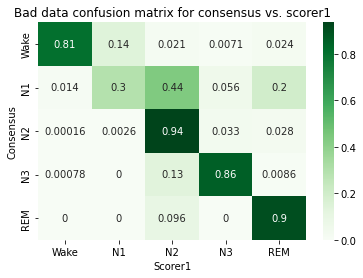

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Bad dataset confusion matrix for scorer1 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []

list_of_length_of_night = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
#print (df_Konsens)

# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')

#print (df_scorer1['scorer'])

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)
#print (df_all_negative_values_to_drop)



#print (len(df_scorer1['scorer']))
#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)

   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer1');ax.set_ylabel('Consensus'); 
ax.set_title('Bad data confusion matrix for consensus vs. scorer1');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('Bad_data_Confusion_matrix_for_consensus_vs_scorer1.png', bbox_inches='tight')

print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)


w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)
agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus1'})
ValueContsDF = AllNightsDF['scorer1'].value_counts()
ValueContsDF1 = AllNightsDF['consensus1'].value_counts()
print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['consensus1'].value_counts())
print (ValueContsDF)
EpochNumberDF = pd.concat([ValueContsDF, ValueContsDF1], axis = 1)

print (EpochNumberDF)

list of cohen kappa that are in every night
[0.829598561101837, 0.6546934817523409, 0.43451638111011337, 0.7413275853734136, 0.7994123977988786, 0.8026056315262018, 0.6043269570127762, 0.8637180436205251, 0.8567857578344105, 0.7901669245662428, 0.8499264662042649, 0.8194281963464277, 0.8926046459432162]
mean of cohens kappa list is  0.7645470023223576
stdev of cohens_kappa_list is  0.12397052806907355
-----------------------------------
       scorer1  else
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
10354        0     0
10355        0     0
10356        0     0
10357        0     0
10358        0     0

[10359 rows x 2 columns]
       Konsens  else
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
10354        0     0
10355        0     0
10356        0     0
10357        0     0
10358        0     0

[10359 rows x 2 columns]
   

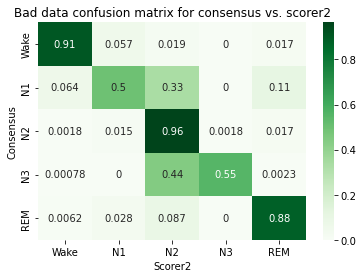

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Bad dataset confusion matrix for scorer2 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
list_of_cohen_kappas = []
list_of_length_of_night = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)
#print (len(df_scorer1['scorer']))

   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer2');ax.set_ylabel('Consensus'); 
ax.set_title('Bad data confusion matrix for consensus vs. scorer2');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('Bad_data_Confusion_matrix_for_consensus_vs_scorer2.png', bbox_inches='tight')


print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 

expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)
agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus2'})
AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer2'})
ValueContsDF = AllNightsDF['scorer2'].value_counts()
ValueContsDF1 = AllNightsDF['consensus2'].value_counts()
print (AllNightsDF['scorer2'].value_counts())
print (AllNightsDF['consensus2'].value_counts())
print (ValueContsDF)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)

print (EpochNumberDF)

list of cohen kappa that are in every night
[0.8921658953389514, 0.6330922044045765, 0.5798919957700133, 0.8474492725637364, 0.8368427543352256, 0.7330207675743383, 0.823975618158723, 0.8026370345799818, 0.7806561002580169, 0.7682352050751013, 0.8145097383635729, 0.7623096191468743, 0.7935264468330601]
mean of cohens kappa list is  0.7744855886463208
stdev of cohens_kappa_list is  0.08230828879708688
-----------------------------------
       scorer1  else
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
10381        0     0
10382        0     0
10383        0     0
10384        0     0
10385        0     0

[10386 rows x 2 columns]
       Konsens  else
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
10381        0     0
10382        0     0
10383        0     0
10384        0     0
10385        0     0

[10386 rows x 2 columns]
    

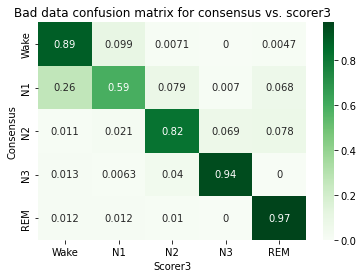

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Bad dataset confusion matrix for scorer3 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
list_of_cohen_kappas = []
list_of_length_of_night = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)

    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)


   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer3');ax.set_ylabel('Consensus'); 
ax.set_title('Bad data confusion matrix for consensus vs. scorer3');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('Bad_data_Confusion_matrix_for_consensus_vs_scorer3.png', bbox_inches='tight')


print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 

expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)
agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus3'})
AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer3'})
ValueContsDF = AllNightsDF['scorer3'].value_counts()
ValueContsDF1 = AllNightsDF['consensus3'].value_counts()
print (AllNightsDF['scorer3'].value_counts())
print (AllNightsDF['consensus3'].value_counts())
print (ValueContsDF)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)

print (EpochNumberDF)

list of cohen kappa that are in every night
[0.6226837393295857, 0.7523268361772442, 0.6210948519040903, 0.680777846784386, 0.7613022967476601, 0.7038922435691664, 0.7571173065458066, 0.7853010806063615, 0.5743923966159343, 0.6486718566110767, 0.7106636599314089, 0.1830526424846608, 0.8067130832380754]
mean of cohens kappa list is  0.6621530646573428
stdev of cohens_kappa_list is  0.15396051831135033
-----------------------------------
       scorer1  else
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
10382        0     0
10383        0     0
10384        0     0
10385        0     0
10386        0     0

[10387 rows x 2 columns]
       Konsens  else
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
10382        0     0
10383        0     0
10384        0     0
10385        0     0
10386        0     0

[10387 rows x 2 columns]
    

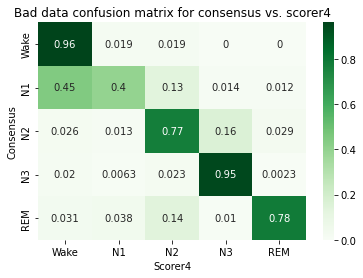

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Bad dataset confusion matrix for scorer4 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
list_of_cohen_kappas = []
list_of_length_of_night = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87, 70, 73]
#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)

print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
ax.set_title('Bad data confusion matrix for consensus vs. scorer4');
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer4');ax.set_ylabel('Consensus'); 
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('Bad_data_Confusion_matrix_for_consensus_vs_scorer4.png', bbox_inches='tight')


print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))


n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 

expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)
agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus4'})
AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer4'})
ValueContsDF = AllNightsDF['scorer4'].value_counts()
ValueContsDF1 = AllNightsDF['consensus4'].value_counts()
print (AllNightsDF['scorer4'].value_counts())
print (AllNightsDF['consensus4'].value_counts())
print (ValueContsDF)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)

print (EpochNumberDF)
EpochNumberDF.to_csv('EpochNumberDFbad.csv', index = True, sep = '\t')

list of cohen kappa that are in every night
[0.8650880429314103, 0.8159750022837553, 0.8325232636547539, 0.8774325519681557, 0.7585718148078356, 0.8634133491389245, 0.844987057409633, 0.9135974376858597, 0.820623940629438, 0.9198750955054313, 0.732360791022199, 0.9137502073312324, 0.5962477023515245, 0.6860102325234, 0.8232517911546587, 0.766570176164089, 0.8456966023735843, 0.7374586607346759, 0.7851920446664161, 0.8578202314874575, 0.8283216174945072, 0.8297776695573995, 0.8588470509830057, 0.7923047124613861, 0.8441919065289339, 0.778904592368828, 0.8200298219062565, 0.8824334806318165, 0.7406727828746178, 0.7923625415940422, 0.8056479168901215, 0.8285541167668107, 0.8555102359947354, 0.8528360111980634, 0.7051025637969464, 0.7635347829723911, 0.7676111139932853, 0.9078503344435775, 0.733021942155101, 0.895055236721653, 0.7690515232588245, 0.7956518823301997, 0.7591469148098877, 0.7855835394531473, 0.8216262991876878, 0.7877553278291776]
mean of cohens kappa list is  0.8099528676962

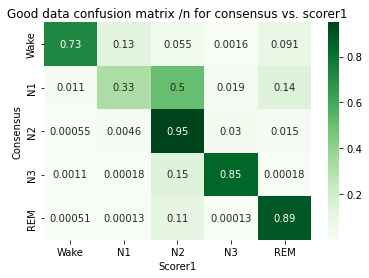

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Good dataset confusion matrix for scorer1 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
list_of_cohen_kappas = []
list_of_length_of_night = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)


    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)
df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer1');ax.set_ylabel('Consensus'); 
ax.set_title('Good data confusion matrix /n for consensus vs. scorer1');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('Good_data_Confusion_matrix_for_consensus_vs_scorer1.png', bbox_inches='tight')


print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 

expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)
agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus1'})
ValueContsDF = AllNightsDF['scorer1'].value_counts()
ValueContsDF1 = AllNightsDF['consensus1'].value_counts()
print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['consensus1'].value_counts())
print (ValueContsDF)
EpochNumberDF = pd.concat([ValueContsDF, ValueContsDF1], axis = 1)

print (EpochNumberDF)

list of cohen kappa that are in every night
[0.7517869732100892, 0.7392174299688751, 0.8418724842220344, 0.8683059707403175, 0.7641809783397709, 0.8192816773909427, 0.8199725023541724, 0.9362756083801517, 0.8022788015192011, 0.8818097253215988, 0.7683575989782887, 0.8427133509042988, 0.6839604094351031, 0.7401454736657611, 0.637384464546917, 0.7582223407624732, 0.6757244348226394, 0.689096158116811, 0.6593105154709543, 0.6390795354958678, 0.6685205392657256, 0.8030649746896886, 0.7915427569307318, 0.7431878737841886, 0.688241736291439, 0.6566511664878185, 0.6638510078494311, 0.801004438792204, 0.7752513995893369, 0.7727622810836151, 0.8082847195771439, 0.8308765890528849, 0.8257751436750117, 0.8482953373220549, 0.7682201470179899, 0.8060645040578152, 0.7417115101936473, 0.7795318203277027, 0.7681410812373518, 0.8365459898909776, 0.780167662811457, 0.7937915524078202, 0.7795367846472472, 0.7478897076601246, 0.7976837026901211, 0.7560670202931139]
mean of cohens kappa list is  0.76851386

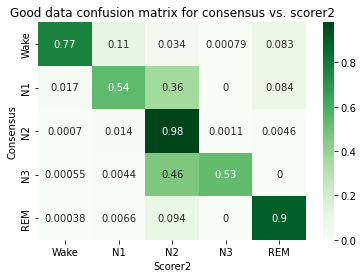

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Good dataset confusion matrix for scorer2 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
list_of_cohen_kappas = []
list_of_length_of_night = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')


#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)

    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)

df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
   
print('-----------------------------------')
print (df_scorer)
print (df_Konsens)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
AllNightsDF = AllNightsDF[AllNightsDF.scorer1 != 4]
print (AllNightsDF)
print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer2');ax.set_ylabel('Consensus'); 
ax.set_title('Good data confusion matrix for consensus vs. scorer2');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('Good_data_Confusion_matrix_for_consensus_vs_scorer2.png', bbox_inches='tight')


print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)
agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer2'})
AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus2'})

ValueContsDF = AllNightsDF['scorer2'].value_counts()
ValueContsDF1 = AllNightsDF['consensus2'].value_counts()
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)
print (EpochNumberDF)

list of cohen kappa that are in every night
[0.8152483264520785, 0.729537620296488, 0.787518246293923, 0.8585359935292531, 0.833698263945744, 0.8151360922961604, 0.7261112532135626, 0.759768009050093, 0.7180631850148982, 0.869801134484544, 0.7962712961206753, 0.8929750354243133, 0.8383378682871239, 0.8371119133574008, 0.8452539210944517, 0.7731502570443157, 0.8505981036713031, 0.7014080629001047, 0.8932006683425406, 0.825948463109784, 0.9026917103505144, 0.8172006219786102, 0.8316303933744847, 0.9111968988988798, 0.7669624604561391, 0.8745468975535948, 0.8323976281127435, 0.828743114672008, 0.8489032079437194, 0.7151275665018137, 0.7361032569004174, 0.8051532051760225, 0.7651040691890187, 0.8718209742668213, 0.7926361830092238, 0.8557061396656772, 0.7510860686766491, 0.8451698007396212, 0.7450827121485382, 0.7959345381403712, 0.8554701002419633, 0.859499570255772, 0.7673488228958301, 0.6471747936445207, 0.8157137637181484, 0.7406457300977783]
mean of cohens kappa list is  0.80753747701

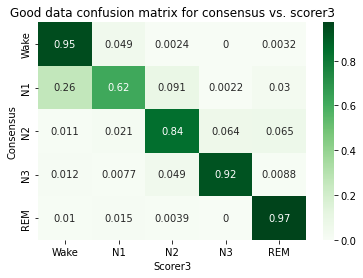

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Good dataset confusion matrix for scorer3 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
list_of_cohen_kappas = []
list_of_length_of_night = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)


    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)    
df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
AllNightsDF = AllNightsDF[AllNightsDF.scorer1 != 8]
print (AllNightsDF)
print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer3');ax.set_ylabel('Consensus'); 
ax.set_title('Good data confusion matrix for consensus vs. scorer3');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('Good_data_Confusion_matrix_for_consensus_vs_scorer3.png', bbox_inches='tight')

print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer3'})
AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus3'})

ValueContsDF = AllNightsDF['scorer3'].value_counts()
ValueContsDF1 = AllNightsDF['consensus3'].value_counts()
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)
print (EpochNumberDF)

list of cohen kappa that are in every night
[0.7446338443957718, 0.7642182238587472, 0.7556952979848506, 0.7128284923928077, 0.7787950811201818, 0.7624796155067464, 0.8358400147654339, 0.8061518381343646, 0.7140410140378273, 0.8297830170406173, 0.7350642099385818, 0.7815284708030332, 0.796131730266597, 0.7809649020414934, 0.7687247565920506, 0.7739807900547048, 0.7315453083950908, 0.663864311660074, 0.746898682071814, 0.757764993284616, 0.7894427030447515, 0.6746032991697142, 0.7604582895330767, 0.7410783362601466, 0.7082202785221139, 0.8409554675309087, 0.8152384304064755, 0.7983196742719367, 0.6808253286264323, 0.6315500849726079, 0.6429030344288336, 0.6713165886121724, 0.6929052242806935, 0.6874934819638698, 0.6705326583235696, 0.7605116561559175, 0.6940728816039807, 0.7941910297562245, 0.67026779679127, 0.7301006680975846, 0.7422043504710661, 0.7745125505277444, 0.7223378589337244, 0.8010578512396693, 0.7360482782620504, 0.777550458553391]
mean of cohens kappa list is  0.7445572359

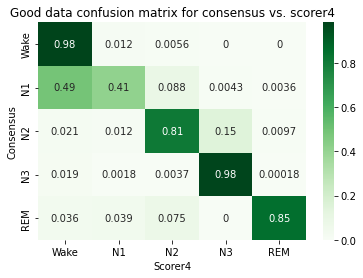

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#Good dataset confusion matrix for scorer4 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
list_of_cohen_kappas = []
list_of_length_of_night = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)


    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)    
df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer4');ax.set_ylabel('Consensus'); 
ax.set_title('Good data confusion matrix for consensus vs. scorer4');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('Good_data_Confusion_matrix_for_consensus_vs_scorer4.png', bbox_inches='tight')

print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 

expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)
agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer4'})
AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus4'})

ValueContsDF = AllNightsDF['scorer4'].value_counts()
ValueContsDF1 = AllNightsDF['consensus4'].value_counts()
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)
print (EpochNumberDF)
EpochNumberDF.to_csv('EpochNumberDFgood.csv', index = True, sep = '\t')

list of cohen kappa that are in every night
[0.8813489353078487, 0.871155038001109, 0.8650880429314103, 0.8159750022837553, 0.8325232636547539, 0.8774325519681557, 0.7585718148078356, 0.8634133491389245, 0.844987057409633, 0.9135974376858597, 0.820623940629438, 0.9198750955054313, 0.732360791022199, 0.9137502073312324, 0.5962477023515245, 0.6860102325234, 0.8232517911546587, 0.766570176164089, 0.8456966023735843, 0.7374586607346759, 0.7851920446664161, 0.8578202314874575, 0.8283216174945072, 0.8297776695573995, 0.8588470509830057, 0.7923047124613861, 0.8441919065289339, 0.778904592368828, 0.8200298219062565, 0.8824334806318165, 0.7406727828746178, 0.7923625415940422, 0.8056479168901215, 0.8285541167668107, 0.8555102359947354, 0.8528360111980634, 0.7051025637969464, 0.7635347829723911, 0.7676111139932853, 0.9078503344435775, 0.733021942155101, 0.895055236721653, 0.7690515232588245, 0.7956518823301997, 0.7591469148098877, 0.7855835394531473, 0.8216262991876878, 0.7877553278291776, 0.9334

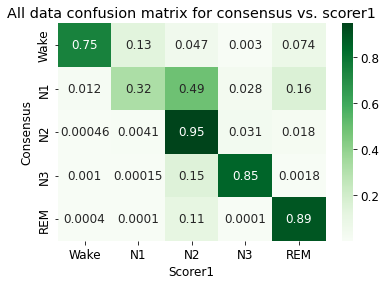

In [119]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#all dataset confusion matrix for scorer1 aand konsens
#here we start counting number of epochs by stages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
list_of_cohen_kappas = []
list_of_length_of_night = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [70, 73, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82, 11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87]

#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer1_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)


    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)    
df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer1');ax.set_ylabel('Consensus'); 
ax.set_title('All data confusion matrix for consensus vs. scorer1');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('All_data_Confusion_matrix_for_consensus_vs_scorer1.png', bbox_inches='tight')

print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 

expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus1'})
ValueContsDF = AllNightsDF['scorer1'].value_counts()
ValueContsDF1 = AllNightsDF['consensus1'].value_counts()
print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['consensus1'].value_counts())
print (ValueContsDF)
EpochNumberDF = pd.concat([ValueContsDF, ValueContsDF1], axis = 1)

print (EpochNumberDF)

list of cohen kappa that are in every night
[0.8194281963464277, 0.8926046459432162, 0.7517869732100892, 0.7392174299688751, 0.8418724842220344, 0.8683059707403175, 0.7641809783397709, 0.8192816773909427, 0.8199725023541724, 0.9362756083801517, 0.8022788015192011, 0.8818097253215988, 0.7683575989782887, 0.8427133509042988, 0.6839604094351031, 0.7401454736657611, 0.637384464546917, 0.7582223407624732, 0.6757244348226394, 0.689096158116811, 0.6593105154709543, 0.6390795354958678, 0.6685205392657256, 0.8030649746896886, 0.7915427569307318, 0.7431878737841886, 0.688241736291439, 0.6566511664878185, 0.6638510078494311, 0.801004438792204, 0.7752513995893369, 0.7727622810836151, 0.8082847195771439, 0.8308765890528849, 0.8257751436750117, 0.8482953373220549, 0.7682201470179899, 0.8060645040578152, 0.7417115101936473, 0.7795318203277027, 0.7681410812373518, 0.8365459898909776, 0.780167662811457, 0.7937915524078202, 0.7795367846472472, 0.7478897076601246, 0.7976837026901211, 0.7560670202931139, 

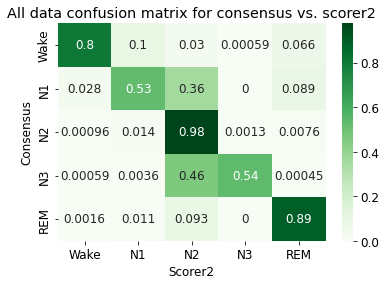

In [120]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#all dataset confusion matrix for scorer2 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []

df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
list_of_cohen_kappas = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [70, 73, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82, 11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87]

#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer2_'+i+'.txt', delimiter='\t')


#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]

    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)


    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)

df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
AllNightsDF = AllNightsDF[AllNightsDF.scorer1 != 4]
print (AllNightsDF)
print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer2');ax.set_ylabel('Consensus'); 
ax.set_title('All data confusion matrix for consensus vs. scorer2');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('All_data_Confusion_matrix_for_consensus_vs_scorer2.png', bbox_inches='tight')

print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)


w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 



expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())
AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer2'})
AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus2'})
ValueContsDF = AllNightsDF['scorer2'].value_counts()
ValueContsDF1 = AllNightsDF['consensus2'].value_counts()
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)
print (EpochNumberDF)

list of cohen kappa that are in every night
[0.7623096191468743, 0.7935264468330601, 0.8152483264520785, 0.729537620296488, 0.787518246293923, 0.8585359935292531, 0.833698263945744, 0.8151360922961604, 0.7261112532135626, 0.759768009050093, 0.7180631850148982, 0.869801134484544, 0.7962712961206753, 0.8929750354243133, 0.8383378682871239, 0.8371119133574008, 0.8452539210944517, 0.7731502570443157, 0.8505981036713031, 0.7014080629001047, 0.8932006683425406, 0.825948463109784, 0.9026917103505144, 0.8172006219786102, 0.8316303933744847, 0.9111968988988798, 0.7669624604561391, 0.8745468975535948, 0.8323976281127435, 0.828743114672008, 0.8489032079437194, 0.7151275665018137, 0.7361032569004174, 0.8051532051760225, 0.7651040691890187, 0.8718209742668213, 0.7926361830092238, 0.8557061396656772, 0.7510860686766491, 0.8451698007396212, 0.7450827121485382, 0.7959345381403712, 0.8554701002419633, 0.859499570255772, 0.7673488228958301, 0.6471747936445207, 0.8157137637181484, 0.7406457300977783, 0.8

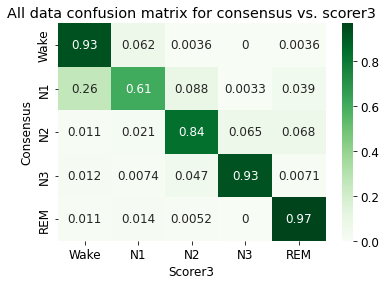

In [121]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#all dataset confusion matrix for scorer3 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
list_of_cohen_kappas = []
list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED

list_of_nights = [70, 73, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82, 11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87]

#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer3_'+i+'.txt', delimiter='\t')


#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)




#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)


    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)    
df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
AllNightsDF = AllNightsDF[AllNightsDF.scorer1 != 8]
print (AllNightsDF)
print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer3');ax.set_ylabel('Consensus'); 
ax.set_title('All data confusion matrix for consensus vs. scorer3');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('All_data_Confusion_matrix_for_consensus_vs_scorer3.png', bbox_inches='tight')

print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)
agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer3'})
AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus3'})

ValueContsDF = AllNightsDF['scorer3'].value_counts()
ValueContsDF1 = AllNightsDF['consensus3'].value_counts()
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)
print (EpochNumberDF)

list of cohen kappa that are in every night
[0.1830526424846608, 0.8067130832380754, 0.7446338443957718, 0.7642182238587472, 0.7556952979848506, 0.7128284923928077, 0.7787950811201818, 0.7624796155067464, 0.8358400147654339, 0.8061518381343646, 0.7140410140378273, 0.8297830170406173, 0.7350642099385818, 0.7815284708030332, 0.796131730266597, 0.7809649020414934, 0.7687247565920506, 0.7739807900547048, 0.7315453083950908, 0.663864311660074, 0.746898682071814, 0.757764993284616, 0.7894427030447515, 0.6746032991697142, 0.7604582895330767, 0.7410783362601466, 0.7082202785221139, 0.8409554675309087, 0.8152384304064755, 0.7983196742719367, 0.6808253286264323, 0.6315500849726079, 0.6429030344288336, 0.6713165886121724, 0.6929052242806935, 0.6874934819638698, 0.6705326583235696, 0.7605116561559175, 0.6940728816039807, 0.7941910297562245, 0.67026779679127, 0.7301006680975846, 0.7422043504710661, 0.7745125505277444, 0.7223378589337244, 0.8010578512396693, 0.7360482782620504, 0.777550458553391, 0.

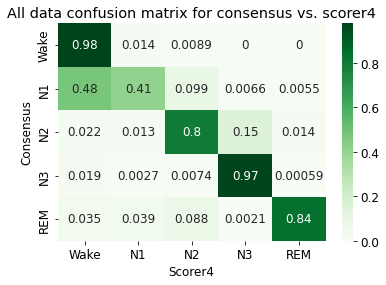

In [122]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 23 15:43:00 2021

@author: user
"""
#all dataset confusion matrix for scorer4 aand konsens
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import seaborn as sn
import math
#first empz lists to save our results
list_of_mismatches_scorer1 = []

list_of_mismatches_scorer1_percent = []

list_of_length_of_night = []
#list of nights we use to count and parse, ADD HERE SMTH IF ZOU WNAT IT TO BE COUNTED
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
list_of_nights = [70, 73, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82, 11, 19, 32, 38, 57, 59,  81, 83, 85, 86, 87]

#scorer3_84 is deleted
#no 23  
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer= pd.read_csv('scorer4_'+i+'.txt', delimiter='\t')

#here i look for inexes of all values in all gataframes that are les than 0
    df_scorer_negative = df_scorer.loc[(df_scorer['scorer'] < 0)].index
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_scorer_negative.union(df_Konsens_negative)

#Here i drop all rows wich are less than 0 in all dataframes
    df_scorer = df_scorer[~df_scorer.index.isin(df_all_negative_values_to_drop)]
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer = df_scorer.rename(columns={'scorer': 'scorer1'})
    df_Konsens = df_Konsens.rename(columns={'scorer': 'Konsens'})
    

    df_scorers = df_scorers.append(df_scorer, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)



    scorer_list = list(df_scorer['scorer1'])
    Konsens_list = list(df_Konsens['Konsens'])
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

print("list of cohen kappa that are in every night")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)    

   
print('-----------------------------------')
print (df_scorers)
print (df_Konsenses)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)

scorer_list = AllNightsDF['scorer1'].tolist()
Konsens_list = AllNightsDF['Konsens'].tolist()
confusion = confusion_matrix(Konsens_list, scorer_list)
print ('confusion matrix without percents')
print (confusion)

cmn = confusion_matrix(Konsens_list, scorer_list, normalize = 'true')
print (cmn)

ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('Scorer4');ax.set_ylabel('Consensus'); 
ax.set_title('All data confusion matrix for consensus vs. scorer4');
ax.set_xticklabels(['Wake','N1','N2','N3','REM'])
ax.set_yticklabels(['Wake','N1','N2','N3','REM'])
plt.savefig('All_data_Confusion_matrix_for_consensus_vs_scorer4.png', bbox_inches='tight')



print ("Cohen kappa is ", cohen_kappa_score(Konsens_list, scorer_list))

n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(Konsens_list, scorer_list) - 1.96*SE
second_interval_number = cohen_kappa_score(Konsens_list, scorer_list) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

print (AllNightsDF['scorer1'].value_counts())
print (AllNightsDF['Konsens'].value_counts())

AllNightsDF = AllNightsDF.rename(columns={'scorer1': 'scorer4'})
AllNightsDF = AllNightsDF.rename(columns={'Konsens': 'consensus4'})

ValueContsDF = AllNightsDF['scorer4'].value_counts()
ValueContsDF1 = AllNightsDF['consensus4'].value_counts()
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF], axis = 1)
EpochNumberDF = pd.concat([EpochNumberDF, ValueContsDF1], axis = 1)
print (EpochNumberDF)
EpochNumberDF.to_csv('EpochNumberDF.csv', index = True, sep = '\t')

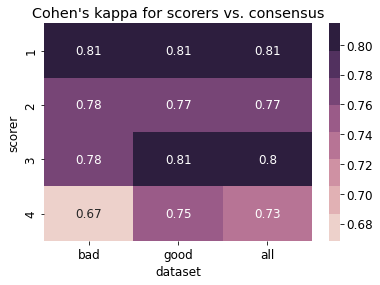

In [96]:
import seaborn as snNew
import pandas as pdNew
import matplotlib.pyplot as pltNew

scorerskappa = [[0.8060592400508125, 0.8143221331797657, 0.81257774406877],
               [0.7766191698876446, 0.7744083927810526, 0.7749495695748922],
               [0.776105272598736, 0.8091780352371296, 0.8019860196296447],
               [0.668428732107672, 0.7472657922425079, 0.7300552445536912]]

DetaFrame_cm = pdNew.DataFrame(scorerskappa, range(4), range(3))
#sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

snNew.heatmap(DetaFrame_cm, annot=True, cmap=snNew.cubehelix_palette(8), xticklabels=['bad', 'good', 'all'], yticklabels=['1','2','3','4'])
plt.title("Cohen's kappa for scorers vs. consensus")
plt.xlabel("dataset")
plt.ylabel("scorer")
plt.savefig('Cohens_kappa_for_scorers_vs_consensus.png', bbox_inches='tight')
pltNew.show()

<Figure size 432x288 with 0 Axes>

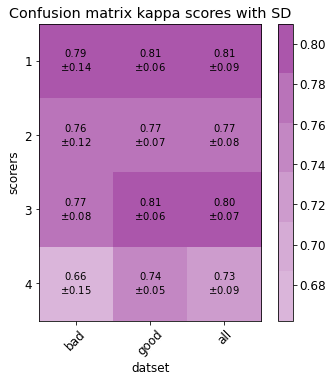

In [95]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

#plot kappa with sd

kappas = [[0.7931632590812956, 0.8099528676962354, 0.806253462408198], [0.7645470023223576, 0.7685138669841938, 0.7676398120587044], [0.7744855886463208, 0.807537477011688, 0.8002548575413527], [0.6621530646573428, 0.7445572359714204, 0.7264003846649285]]
sds = [[0.137996307931718, 0.0644044859446083, 0.08647729440056232], [0.12397052806907355, 0.06690574002437591, 0.08294023556442859], [0.08230828879708688, 0.05904163298894265, 0.06631907589689778], [0.15396051831135033, 0.05180137772805444, 0.09209526704452191]]

# lists of rows into np arraz
arraykappas = np.array(kappas)
arraysds = np.array(sds)
class_list = ['1','2','3','4']
class_list2 = ['bad', 'good', 'all']
colorarray=[[100, 200, 100, 0.37], [100, 200, 100, 0.42],  [100, 200, 100, 0.5], [100, 200, 100, 0.6], [100, 200, 100 ,0.7 ],  [100, 200, 100, 0.85]]


#function for plotting
def plot_confusion_matrix(cm, cms,  classes, classes2,
                          cmap=ListedColormap(colorarray)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    tick_marks2 = np.arange(len(classes2))
    plt.xticks(tick_marks2, classes2, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=10,
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Confusion matrix kappa scores with SD")
    plt.rc('font', size=12) 
    plt.ylabel('scorers')
    plt.xlabel('datset') # x labels ^^^^ bad good all


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(arraykappas, arraysds, classes=class_list, classes2 = class_list2)
plt.savefig('Confusion_matrix_kappa_scores_with_SD_2.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

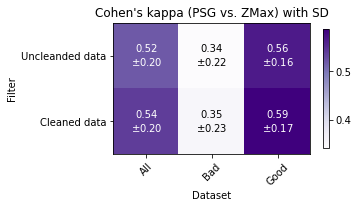

In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np

#plot kappa with sd plot all first

kappas = [[0.519451675649794, 0.3417630004250863, 0.5648189969837619],
         [0.5391858768751597, 0.3528369917790186, 0.5867643156231105]]
sds = [[0.19530103053185424, 0.2190930960604663, 0.15970527028913242],
      [0.20487603405221969, 0.22539063043480498, 0.16908771380137005]]

# lists of rows into np arraz
arraykappas = np.array(kappas)
arraysds = np.array(sds)
class_list = ['Uncleanded data', 'Cleaned data']
class_list2 = ['All', 'Bad', 'Good']
#colorarray=[[100, 200, 100, 0.37], [100, 200, 100, 0.42],  [100, 200, 100, 0.5], [100, 200, 100, 0.6], [100, 200, 100 ,0.7 ],  [100, 200, 100, 0.85]]


#function for plotting 

def plot_confusion_matrix(cm, cms,  classes, classes2,
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(shrink = 0.35)
    tick_marks = np.arange(len(classes))
    tick_marks2 = np.arange(len(classes2))
    plt.xticks(tick_marks2, classes2, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 1.5

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=10,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Cohen's kappa (PSG vs. ZMax) with SD")
    plt.rc('font', size=12) 
    plt.ylabel('Filter')
    plt.xlabel('Dataset') # x labels ^^^^all bad good 


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(arraykappas, arraysds, classes=class_list, classes2 = class_list2)
plt.savefig("Cohen's kappa (PSG vs. ZMax) with SD.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

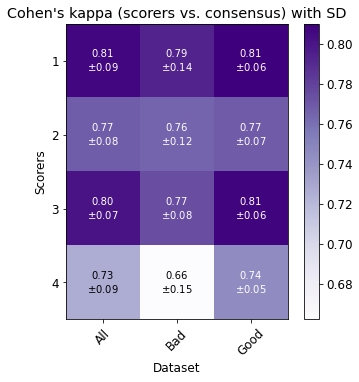

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

#plot kappa with sd plot all first

kappas = [[0.806253462408198, 0.7931632590812956, 0.8099528676962354], 
          [0.7676398120587044, 0.7645470023223576, 0.7685138669841938], 
          [0.8002548575413527, 0.7744855886463208, 0.807537477011688], 
          [0.7264003846649285, 0.6621530646573428, 0.7445572359714204]]
sds = [[0.08647729440056232, 0.137996307931718, 0.0644044859446083], 
       [0.08294023556442859, 0.12397052806907355, 0.06690574002437591], 
       [0.06631907589689778, 0.08230828879708688, 0.05904163298894265], 
       [0.09209526704452191, 0.15396051831135033, 0.05180137772805444]]

# lists of rows into np arraz
arraykappas = np.array(kappas)
arraysds = np.array(sds)
class_list = ['1','2','3','4']
class_list2 = ['All', 'Bad', 'Good']
colorarray=[[100, 200, 100, 0.37], [100, 200, 100, 0.42],  [100, 200, 100, 0.5], [100, 200, 100, 0.6], [100, 200, 100 ,0.7 ],  [100, 200, 100, 0.85]]


#function for plotting 

def plot_confusion_matrix(cm, cms,  classes, classes2,
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    tick_marks2 = np.arange(len(classes2))
    plt.xticks(tick_marks2, classes2, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 1.1

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=10,
                     color="black" if cm[i, j] < thresh else "white")

    plt.tight_layout()
    plt.title("Cohen's kappa (scorers vs. consensus) with SD")
    plt.rc('font', size=12) 
    plt.ylabel('Scorers')
    plt.xlabel('Dataset') # x labels ^^^^ bad good all


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))

plot_confusion_matrix(arraykappas, arraysds, classes=class_list, classes2 = class_list2)
plt.savefig("Cohen's kappa (scorers vs. consensus) with SD.png", bbox_inches='tight')

In [72]:
import pandas as pd

df_number_of_epochs = pd.read_csv('EpochNumberDF.csv', delimiter='\t')
df_number_of_epochs.columns = ['sleep stage', 'scorer1',  'consensus1',  'scorer2',  'consensus2',  'scorer3',  'consensus3', 'scorer4', 'consensus4' ]

print (df_number_of_epochs)
df_number_of_epochs.style

#array_for_table = [df_number_of_epochs["scorer1"][0], df_number_of_epochs["consensus1"][0], df_number_of_epochs["scorer2"][0], df_number_of_epochs["consensus2"][0], ]
#print (array_for_table)

   sleep stage  scorer1  consensus1  scorer2  consensus2  scorer3  consensus3  \
0            0     1306        1692     1452        1690     2512        1689   
1            1      906        1810     1615        1805     1951        1810   
2            2    27706       26077    30142       26040    22332       26098   
3            3     6581        6737     3639        6737     7951        6751   
4            5     9780        9963     9387        9963    11566        9964   

   scorer4  consensus4  
0     3556        1681  
1     1497        1810  
2    21935       26061  
3    10542        6737  
4     8723        9964  


,sleep stage,scorer1,consensus1,scorer2,consensus2,scorer3,consensus3,scorer4,consensus4
0,0,1306,1692,1452,1690,2512,1689,3556,1681
1,1,906,1810,1615,1805,1951,1810,1497,1810
2,2,27706,26077,30142,26040,22332,26098,21935,26061
3,3,6581,6737,3639,6737,7951,6751,10542,6737
4,5,9780,9963,9387,9963,11566,9964,8723,9964
